In [1]:
import tensorflow as tf
import numpy as np
from six.moves import cPickle as pickle
import random
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
pickle_file = '../dataset/arbimon_VGG.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (705, 224, 224) (705,)
Validation set (235, 224, 224) (235,)
Test set (235, 224, 224) (235,)


In [3]:
image_size = train_dataset.shape[2]
num_channels = 1
num_labels = 21

def reformat(dataset):#, labels):
    #dataset = np.squeeze(dataset).shape
    dataset = dataset.reshape((-1, image_size, image_size, num_channels, )
                           ).astype(np.float32)
  #labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset#, labels
X_train = reformat(train_dataset)#, train_labels)
X_validation = reformat(valid_dataset)#, valid_labels)
X_test = reformat(test_dataset)#, test_labels)
y_train = train_labels
y_validation = valid_labels
y_test = test_labels
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_validation.shape, y_validation.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (705, 224, 224, 1) (705,)
Validation set (235, 224, 224, 1) (235,)
Test set (235, 224, 224, 1) (235,)


16


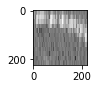

In [4]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [5]:
X_train, y_train = shuffle(X_train, y_train)

In [8]:
EPOCHS = 50
BATCH_SIZE = 100

In [9]:
def conv2d(x, W, b, strides, padding):
    x = tf.nn.conv2d(x, 
                     W, 
                     strides=[1, strides, strides, 1], 
                     padding = padding)
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)

def maxpool2d(x, k, padding):
    return tf.nn.max_pool(x, 
                          ksize=[1, k, k, 1], 
                          strides = [1, strides, strides, 1], 
                          padding = padding)



In [13]:
def VGGNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    ## Layer 1: Convolutional, Activation, Pooling
    layer1_conv_1 = tf.layers.conv2d(inputs = x, 
                                     filters=64,
                                     kernel_size=[3,3],
                                     padding='same',
                                     activation=tf.nn.relu)
    layer1_conv_2 = tf.layers.conv2d(inputs = layer1_conv_1,
                                    filters = 64, 
                                    kernel_size=[3,3], 
                                    padding='same', 
                                    activation=tf.nn.relu)
    layer1 = tf.layers.max_pooling2d(inputs=layer1_conv_2, 
                                     pool_size=[2, 2], 
                                     strides=2,
                                     padding='same')
    
    
    ## Layer 2: Conv, Activation, Pooling
    layer2_conv_1 = tf.layers.conv2d(inputs = layer1,
                                    filters=128,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer2_conv_2 = tf.layers.conv2d(inputs=layer2_conv_1,
                                    filters=128,
                                    kernel_size=[3,3],
                                    padding='same')
    layer2 = tf.layers.max_pooling2d(inputs=layer2_conv_2, 
                                     pool_size=[2,2], 
                                     strides=2, 
                                     padding='same')
    
    ## Layer 3: Conv, Activation, Pooling
    layer3_conv_1 = tf.layers.conv2d(inputs = layer2,
                                    filters=256,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer3_conv_2 = tf.layers.conv2d(inputs = layer3_conv_1,
                                    filters=256,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer3_conv_3 = tf.layers.conv2d(inputs = layer3_conv_2,
                                    filters=256,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer3_conv_4 = tf.layers.conv2d(inputs = layer3_conv_3,
                                    filters=256,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer3 = tf.layers.max_pooling2d(inputs=layer3_conv_4, 
                                    pool_size=[2,2], 
                                    strides=2, 
                                    padding='same')

    ## Layer 4: Conv, Activation, Pooling
    layer4_conv_1 = tf.layers.conv2d(inputs = layer3,
                                    filters=512,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer4_conv_2 = tf.layers.conv2d(inputs = layer4_conv_1,
                                    filters=512,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer4_conv_3 = tf.layers.conv2d(inputs = layer4_conv_2,
                                    filters=512,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer4_conv_4 = tf.layers.conv2d(inputs = layer4_conv_3,
                                    filters=512,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer4 = tf.layers.max_pooling2d(inputs=layer4_conv_4, 
                                    pool_size=[2,2], 
                                    strides=2, 
                                    padding='same')
    
    ## Layer 5: Conv, Activation, Pooling
    layer5_conv_1 = tf.layers.conv2d(inputs = layer4,
                                    filters=512,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer5_conv_2 = tf.layers.conv2d(inputs = layer5_conv_1,
                                    filters=512,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer5_conv_3 = tf.layers.conv2d(inputs = layer5_conv_2,
                                    filters=512,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer5_conv_4 = tf.layers.conv2d(inputs = layer5_conv_3,
                                    filters=512,
                                    kernel_size=[3,3],
                                    padding='same',
                                    activation=tf.nn.relu)
    layer5 = tf.layers.max_pooling2d(inputs=layer5_conv_4, 
                                    pool_size=[2,2], 
                                    strides=2, 
                                    padding='same')
    
    ## Layer 6: MaxPooling, FC1
    layer6 = tf.layers.max_pooling2d(inputs=layer5,
                                    pool_size=[2,2],
                                    strides=2,
                                    padding='same')
    fc = flatten(layer6)
    
    fc1 = tf.contrib.layers.fully_connected(inputs=fc,
                                     num_outputs=4096)
    
    ## Layer 7: FC2
    fc2 = tf.contrib.layers.fully_connected(inputs=fc1, 
                                            num_outputs=4096)
    
    ## Layer 8: FC3
    logits = tf.contrib.layers.fully_connected(inputs=fc2,
                                              num_outputs=1000)    
    return logits

In [14]:
x = tf.placeholder(tf.float32, (None, 224, 224, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 21)

In [15]:
rate = 0.05

logits = VGGNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        if (i%10 == 0):
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
    import os
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    save_path='VGGNET'
    if not os.path.isabs(save_path):
        save_path = os.path.abspath(os.path.join(os.getcwd(), save_path))
    saver.save(sess, save_path)
    print("Model saved")

Training...



In [ ]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))